In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')
combined_data = pd.merge(transactions_customers, products, on='ProductID', how='inner')
combined_data['TransactionDate'] = pd.to_datetime(combined_data['TransactionDate'])
combined_data.to_csv('Combined_Data.csv', index=False)
print("Combined data saved to 'Combined_Data.csv'")
print(combined_data.info())
print(combined_data.head())


Combined data saved to 'Combined_Data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Descriptive Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.11798

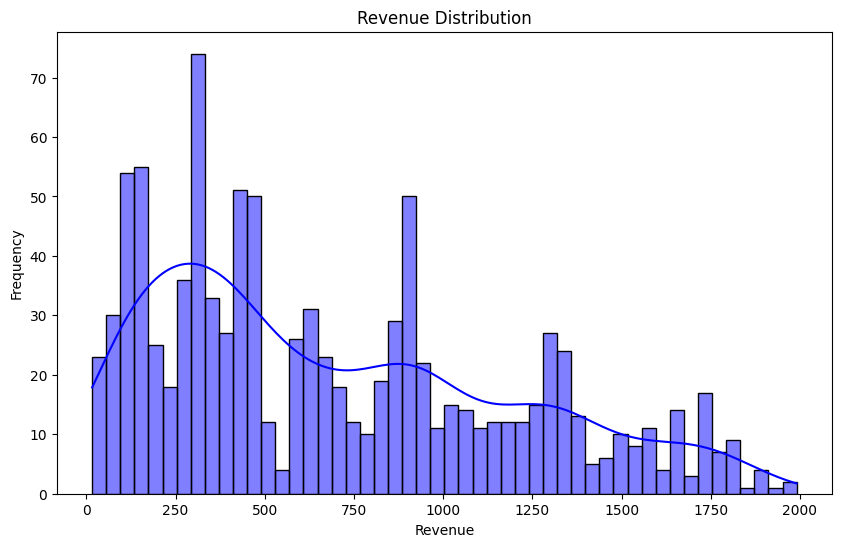

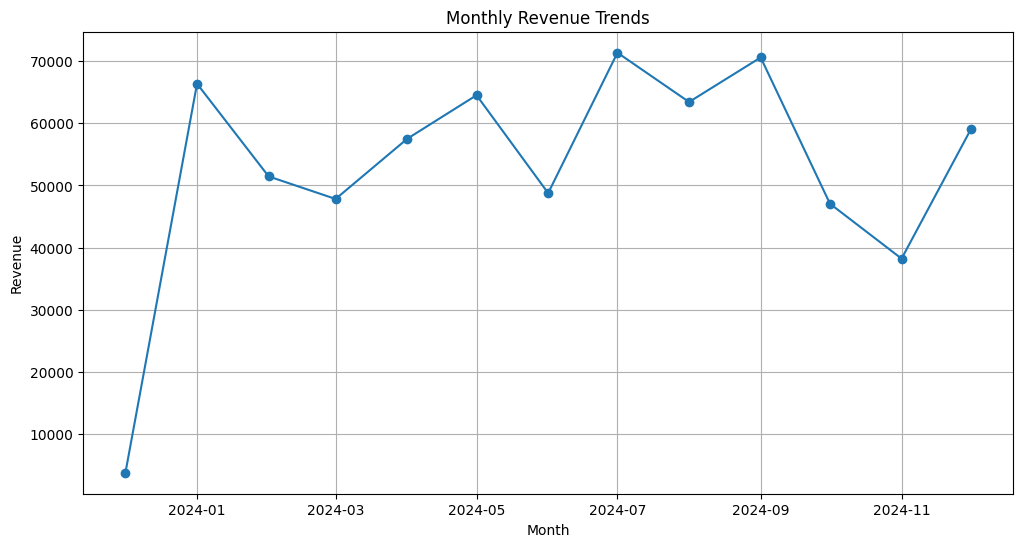

In [6]:
print("\nMissing Values:")
print(combined_data.isnull().sum())
print("\nDescriptive Statistics:")
print(combined_data.describe())
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['TotalValue'], bins=50, kde=True, color='blue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()
monthly_revenue = combined_data.groupby(combined_data['TransactionDate'].dt.to_period('M'))[['TotalValue']].sum().reset_index()
monthly_revenue['TransactionDate'] = monthly_revenue['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['TransactionDate'], monthly_revenue['TotalValue'], marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()
